# Description

This notebook runs some pre-analyses using spectral clustering to explore the best set of parameters to cluster `pca` data version.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

2

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=2
env: OPEN_BLAS_NUM_THREADS=2
env: NUMEXPR_NUM_THREADS=2
env: OMP_NUM_THREADS=2


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 40000

# PCA

In [6]:
INPUT_SUBSET = "pca"

In [7]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
DR_OPTIONS = {
    "n_components": 50,
    "svd_solver": "full",
    "random_state": 0,
}

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/pca/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

'pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full'

In [10]:
data = pd.read_pickle(input_filepath)

In [11]:
data.shape

(3752, 50)

In [12]:
data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,0.805216,-0.865390,0.699480,-0.065976,0.999617,-0.418645,1.993288,-0.346875,-1.522978,-2.382791,...,0.777932,0.507896,0.693668,1.024260,0.189606,-1.661826,0.281234,-0.096792,-0.339508,0.041431
100002_raw-Energy,0.588507,-1.491772,1.756340,-3.593295,2.100607,0.364910,1.254815,2.028484,-0.357607,-4.832726,...,-0.780215,-2.285033,-0.607663,-2.727018,1.711667,-0.535025,2.342068,0.197519,1.636996,-1.114410
100003_raw-Protein,1.910160,-1.873687,1.876677,-3.832557,1.240704,2.941375,2.293978,0.802473,0.665380,-4.375319,...,-0.547161,0.514721,0.034145,-0.423218,-0.324825,-0.000958,0.294579,1.186937,0.226722,0.169931
100004_raw-Fat,0.750799,-0.294733,1.317710,-1.346081,2.006403,0.533509,-0.752916,0.937515,-0.572191,-2.451612,...,0.060359,-0.878309,-0.774943,-1.914890,2.559763,1.547267,1.851110,-0.310431,3.495624,-1.595785
100005_raw-Carbohydrate,-0.530044,-0.007398,0.611418,-3.604094,2.227872,0.051271,0.001135,2.303819,-0.387759,-5.686184,...,-1.110273,-3.032541,-1.223873,-0.945626,2.150276,-1.798716,2.526678,0.716987,0.300972,-0.893854


# Clustering

In [13]:
from sklearn.cluster import SpectralClustering

from clustering.utils import compute_performance

## `gamma` parameter

### Using default value (`gamma=1.0`)

In [14]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        eigen_tol=1e-3,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=1.00,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [15]:
# show number of clusters and their size
_tmp = pd.Series(part).value_counts()
display(_tmp)
assert _tmp.shape[0] == 2
assert _tmp.loc[1] == 1

0    3751
1       1
dtype: int64

For default values of `gamma` (`1.0`), the algorithm takes a lot of time to converge (here I used `eigen_tol=1e-03` to force convergence).

### Using `gamma=5.00`

In [16]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        eigen_tol=1e-3,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=5.00,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:310: RuntimeWarning: overflow encountered in multiply
  distances = - 2 * safe_sparse_dot(X, Y.T, den

In [17]:
# show number of clusters and their size
_tmp = pd.Series(part).value_counts()
display(_tmp)
assert _tmp.shape[0] == 1

0    3752
dtype: int64

The algorithm does not work either with `gamma>1.0`.

### Using `gamma=0.01`

In [18]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        #         eigen_tol=1e-3,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=0.01,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

In [19]:
# show number of clusters and their size
_tmp = pd.Series(part).value_counts()
display(_tmp)
assert _tmp.shape[0] == 2
assert _tmp.loc[1] == 12

0    3740
1      12
dtype: int64

In [20]:
# show some clustering performance measures to assess the quality of the partition
_tmp = compute_performance(data, part)
assert 0.50 < _tmp["si"] < 0.58
assert 95.0 < _tmp["ch"] < 97.00
assert 0.50 < _tmp["db"] < 0.55

'Silhouette (higher is better): 0.573'

'Calinski-Harabasz (higher is better): 96.586'

'Davies-Bouldin (lower is better): 0.530'

For values around `gamma=0.01` the algorithm seems to work.

### Using `gamma=0.001`

In [21]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        #         eigen_tol=1e-3,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=0.001,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

In [22]:
# show number of clusters and their size
_tmp = pd.Series(part).value_counts()
display(_tmp)
assert _tmp.shape[0] == 2
assert _tmp.loc[1] == 112

0    3640
1     112
dtype: int64

In [23]:
# show some clustering performance measures to assess the quality of the partition
_tmp = compute_performance(data, part)
assert 0.50 < _tmp["si"] < 0.58
assert 280.0 < _tmp["ch"] < 290.00
assert 1.90 < _tmp["db"] < 2.00

'Silhouette (higher is better): 0.563'

'Calinski-Harabasz (higher is better): 288.701'

'Davies-Bouldin (lower is better): 1.979'

For values around `gamma=0.001`, the algorithm converges faster, although not necessary finds better solutions. This suggests smaller values should be explored for this parameter.

## Extended test

Here I run some test across several `k` and `gamma` values; then I check how results perform with different clustering quality measures.

In [24]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_RANGE"] = [2, 4, 6, 8, 10, 20, 30, 40, 50, 60]
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10
CLUSTERING_OPTIONS["GAMMAS"] = [
    1e-02,
    1e-03,
    #     1e-04,
    #     1e-05,
    1e-05,
    #     1e-06,
    #     1e-07,
    #     1e-08,
    #     1e-09,
    1e-10,
    #     1e-11,
    #     1e-12,
    #     1e-13,
    #     1e-14,
    1e-15,
    1e-17,
    1e-20,
    1e-30,
    1e-40,
    1e-50,
]
CLUSTERING_OPTIONS["AFFINITY"] = "rbf"

display(CLUSTERING_OPTIONS)

{'K_RANGE': [2, 4, 6, 8, 10, 20, 30, 40, 50, 60],
 'N_REPS_PER_K': 5,
 'KMEANS_N_INIT': 10,
 'GAMMAS': [0.01,
  0.001,
  1e-05,
  1e-10,
  1e-15,
  1e-17,
  1e-20,
  1e-30,
  1e-40,
  1e-50],
 'AFFINITY': 'rbf'}

In [25]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in CLUSTERING_OPTIONS["K_RANGE"]:
    for gamma_value in CLUSTERING_OPTIONS["GAMMAS"]:
        for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
            clus = SpectralClustering(
                eigen_solver="arpack",
                n_clusters=k,
                n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
                affinity=CLUSTERING_OPTIONS["AFFINITY"],
                gamma=gamma_value,
                random_state=random_state,
            )

            method_name = type(clus).__name__
            CLUSTERERS[f"{method_name} #{idx}"] = clus

            random_state = random_state + 1
            idx = idx + 1

In [26]:
display(len(CLUSTERERS))

500

In [27]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('SpectralClustering #0',
 SpectralClustering(eigen_solver='arpack', gamma=0.01, n_clusters=2,
                    random_state=40000))

('SpectralClustering #1',
 SpectralClustering(eigen_solver='arpack', gamma=0.01, n_clusters=2,
                    random_state=40001))

In [28]:
clustering_method_name = method_name
display(clustering_method_name)

'SpectralClustering'

## Generate ensemble

In [29]:
import tempfile
from clustering.ensembles.utils import generate_ensemble

In [32]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=["n_clusters", "gamma"],
)

'Ensemble file exists'

In [33]:
ensemble.shape

(500, 4)

In [34]:
ensemble.head()

,clusterer_params,partition,n_clusters,gamma
clusterer_id,,,,
SpectralClustering #0,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.01
SpectralClustering #1,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.01
SpectralClustering #2,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.01
SpectralClustering #3,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.01
SpectralClustering #4,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.01


In [35]:
ensemble["gamma"] = ensemble["gamma"].apply(lambda x: f"{x:.1e}")

In [36]:
ensemble["n_clusters"].value_counts()

60    50
50    50
40    50
30    50
20    50
10    50
8     50
6     50
4     50
2     50
Name: n_clusters, dtype: int64

In [37]:
_tmp = ensemble["n_clusters"].value_counts().unique()
assert _tmp.shape[0] == 1
assert _tmp[0] == int(
    CLUSTERING_OPTIONS["N_REPS_PER_K"] * len(CLUSTERING_OPTIONS["GAMMAS"])
)

In [38]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    500.000000
mean      23.000000
std       19.844082
min        2.000000
25%        6.000000
50%       15.000000
75%       40.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [39]:
assert ensemble_stats["min"] > 1

In [40]:
assert not ensemble["n_clusters"].isna().any()

In [41]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [42]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [43]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])
assert not np.any(
    [pd.Series(part["partition"]).isna().any() for idx, part in ensemble.iterrows()]
)

In [44]:
# check that the number of clusters in the partitions are the expected ones
_real_k_values = ensemble["partition"].apply(lambda x: np.unique(x).shape[0])
display(_real_k_values)
assert np.all(ensemble["n_clusters"].values == _real_k_values.values)

clusterer_id
SpectralClustering #0       2
SpectralClustering #1       2
SpectralClustering #2       2
SpectralClustering #3       2
SpectralClustering #4       2
                           ..
SpectralClustering #495    60
SpectralClustering #496    60
SpectralClustering #497    60
SpectralClustering #498    60
SpectralClustering #499    60
Name: partition, Length: 500, dtype: int64

## Add clustering quality measures

In [45]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

In [46]:
ensemble = ensemble.assign(
    si_score=ensemble["partition"].apply(lambda x: silhouette_score(data, x)),
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x)),
    db_score=ensemble["partition"].apply(lambda x: davies_bouldin_score(data, x)),
)

In [47]:
ensemble.shape

(500, 7)

In [48]:
ensemble.head()

,clusterer_params,partition,n_clusters,gamma,si_score,ch_score,db_score
clusterer_id,,,,,,,
SpectralClustering #0,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-02,0.573487,96.586303,0.530212
SpectralClustering #1,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-02,0.573487,96.586303,0.530212
SpectralClustering #2,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-02,0.573487,96.586303,0.530212
SpectralClustering #3,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-02,0.573487,96.586303,0.530212
SpectralClustering #4,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-02,0.573487,96.586303,0.530212


# Cluster quality

In [49]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters", "gamma"]).mean()
    display(_df)

si_score    ch_score   db_score
n_clusters gamma                                   
2          1.0e-02  0.573487   96.586303   0.530212
           1.0e-03  0.563166  288.701044   1.979124
           1.0e-05  0.483698  304.317601   2.317783
           1.0e-10  0.483698  304.317601   2.317783
           1.0e-15  0.467945  302.761801   2.355240
           1.0e-17  0.040719    1.175229  18.828174
           1.0e-20 -0.003735    0.976355   8.516577
           1.0e-30  0.003792    1.063093  25.318291
           1.0e-40  0.020224    1.128614  14.848006
           1.0e-50 -0.018902    1.115282  19.245794
4          1.0e-02  0.574426   68.247719   0.530126
           1.0e-03  0.538203  154.666285   1.383851
           1.0e-05  0.468727  178.457611   1.915573
           1.0e-10  0.482336  178.145309   1.824615
           1.0e-15  0.312164  174.406439   2.184357
           1.0e-17 -0.035222    1.487692  15.090239
           1.0e-20 -0.035858    1.218787  19.736072
           1.0e-30 -0.095409    1.097025  16.510146
           1.0e-40 -0.054341    1.331287  15.980292
           1.0e-50 -0.076653    0.974232  17.726775
6          1.0e-02  0.578251   73.346113   0.561848
           1.0e-03  0.563205  108.533882   1.241195
           1.0e-05  0.196906  144.069395   2.173387
           1.0e-10  0.233971  143.570465   2.051013
           1.0e-15  0.246827  141.317562   1.995375
           1.0e-17 -0.123142    0.918002  13.649676
           1.0e-20 -0.145396    0.953052   9.095206
           1.0e-30 -0.097092    0.983230  16.141420
           1.0e-40 -0.102311    1.048471  10.317452
           1.0e-50 -0.108749    0.891324  13.011907
8          1.0e-02  0.534241   66.570122   0.628513
           1.0e-03  0.509308   97.133489   1.091586
           1.0e-05  0.083910  128.005334   2.856265
           1.0e-10  0.116585  129.040752   2.531359
           1.0e-15  0.042673  123.803452   3.357962
           1.0e-17 -0.122006    0.935397  17.625758
           1.0e-20 -0.124061    0.897070  13.251493
           1.0e-30 -0.109272    1.043057  14.593748
           1.0e-40 -0.118944    1.080244  14.499802
           1.0e-50 -0.123978    1.289142  15.894471
10         1.0e-02  0.538553   79.036202   0.631684
           1.0e-03  0.517525   90.097070   1.094555
           1.0e-05  0.052677  118.358212   2.652971
           1.0e-10  0.049199  119.081499   2.695754
           1.0e-15  0.013079  109.631943   3.390838
           1.0e-17 -0.119906    1.022994  14.880160
           1.0e-20 -0.135584    1.179853  14.596829
           1.0e-30 -0.138318    1.071299  13.221733
           1.0e-40 -0.138749    0.896895  13.795135
           1.0e-50 -0.139279    1.142017  14.804684
20         1.0e-02  0.474090   48.060560   0.558217
           1.0e-03  0.026581   76.115234   1.815919
           1.0e-05  0.023970   85.138734   2.586959
           1.0e-10  0.021160   84.240893   2.747873
           1.0e-15  0.014225   77.892856   3.528732
           1.0e-17 -0.177005    0.959954   9.069314
           1.0e-20 -0.175982    1.045830  10.360700
           1.0e-30 -0.172122    1.075374  10.386707
           1.0e-40 -0.197702    0.973492   9.186584
           1.0e-50 -0.165823    0.959588  10.284961
30         1.0e-02  0.460508   37.025701   0.497485
           1.0e-03  0.027355   62.990745   1.960777
           1.0e-05  0.028168   66.576427   2.583550
           1.0e-10  0.029482   67.361703   2.462520
           1.0e-15  0.004319   52.863795   4.223547
           1.0e-17 -0.204686    1.026894   8.011132
           1.0e-20 -0.214726    1.036447   8.042537
           1.0e-30 -0.203292    1.047460   7.936902
           1.0e-40 -0.194369    1.059380   8.303216
           1.0e-50 -0.214461    1.030046   7.782673
40         1.0e-02  0.413834   29.346208   0.736646
           1.0e-03  0.032681   55.201064   2.043251
           1.0e-05  0.031540   55.726672   2.557213
           1.0e-10  0.034106   56.329756   2.492486
           1.0e-15 -0.001465   44.657634   4.184013
           1.0e-

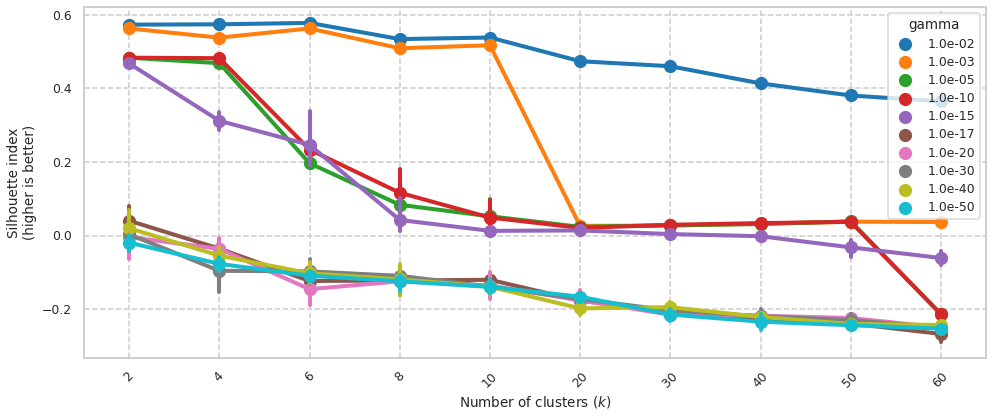

In [50]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="si_score", hue="gamma")
    ax.set_ylabel("Silhouette index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

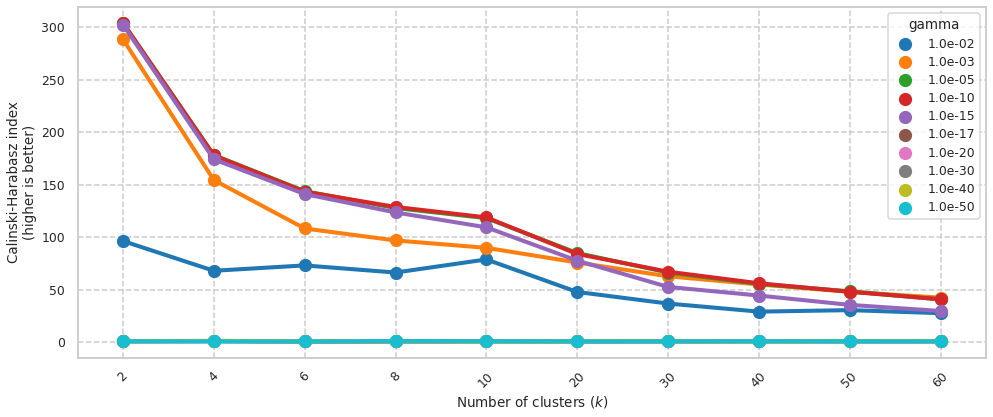

In [51]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score", hue="gamma")
    ax.set_ylabel("Calinski-Harabasz index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

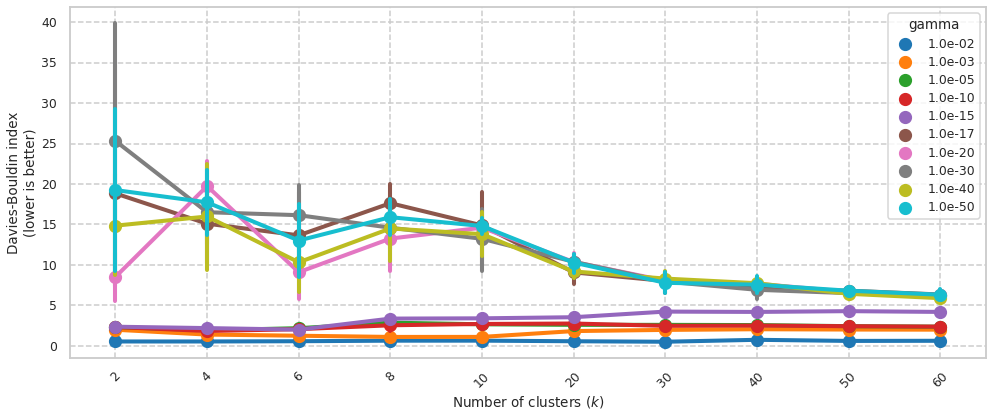

In [52]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="db_score", hue="gamma")
    ax.set_ylabel("Davies-Bouldin index\n(lower is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [53]:
parts = ensemble.groupby(["gamma", "n_clusters"]).apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [54]:
parts.shape

(100,)

In [55]:
parts.head()

gamma    n_clusters
1.0e-02  2             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         4             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         6             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         8             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         10            [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
dtype: object

In [56]:
parts.iloc[0].shape

(5, 3752)

In [57]:
assert np.all(
    [
        parts.loc[k].shape == (int(CLUSTERING_OPTIONS["N_REPS_PER_K"]), data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [58]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [59]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="n_clusters"
)

In [60]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

1.0e-02  2     1.000000
         30    1.000000
1.0e-05  2     1.000000
1.0e-03  6     1.000000
1.0e-10  2     1.000000
1.0e-03  2     1.000000
         4     1.000000
1.0e-02  20    1.000000
         10    1.000000
         8     1.000000
         6     1.000000
         4     1.000000
1.0e-05  6     0.990922
1.0e-02  60    0.974192
         40    0.969023
Name: n_clusters, dtype: float64

In [61]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)
parts_ari_df.index.rename(["gamma", "n_clusters"], inplace=True)

In [62]:
parts_ari_df.shape

(100, 10)

In [63]:
_n_total_parts = int(
    CLUSTERING_OPTIONS["N_REPS_PER_K"]
)  # * len(CLUSTERING_OPTIONS["GAMMAS"]))

assert int(_n_total_parts * (_n_total_parts - 1) / 2) == parts_ari_df.shape[1]

In [64]:
parts_ari_df.head()

0    1    2    3    4    5    6    7    8    9
gamma   n_clusters                                                  
1.0e-02 2           1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
        4           1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
        6           1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
        8           1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
        10          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

## Stability plot

In [65]:
parts_ari_df_plot = (
    parts_ari_df.stack().reset_index().rename(columns={"level_2": "idx", 0: "ari"})
)

In [66]:
parts_ari_df_plot.dtypes

gamma          object
n_clusters      int64
idx             int64
ari           float64
dtype: object

In [67]:
parts_ari_df_plot.head()

,gamma,n_clusters,idx,ari
0,1.0e-02,2,0,1.0
1,1.0e-02,2,1,1.0
2,1.0e-02,2,2,1.0
3,1.0e-02,2,3,1.0
4,1.0e-02,2,4,1.0


In [68]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = parts_ari_df_plot.groupby(["n_clusters", "gamma"]).mean()
    display(_df)

idx       ari
n_clusters gamma                 
2          1.0e-02  4.5  1.000000
           1.0e-03  4.5  1.000000
           1.0e-05  4.5  1.000000
           1.0e-10  4.5  1.000000
           1.0e-15  4.5  0.943603
           1.0e-17  4.5  0.001081
           1.0e-20  4.5 -0.002393
           1.0e-30  4.5  0.000655
           1.0e-40  4.5 -0.002153
           1.0e-50  4.5 -0.002797
4          1.0e-02  4.5  1.000000
           1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.955519
           1.0e-10  4.5  0.954437
           1.0e-15  4.5  0.722145
           1.0e-17  4.5  0.002100
           1.0e-20  4.5  0.001151
           1.0e-30  4.5 -0.002441
           1.0e-40  4.5 -0.000435
           1.0e-50  4.5  0.002505
6          1.0e-02  4.5  1.000000
           1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.990922
           1.0e-10  4.5  0.774267
           1.0e-15  4.5  0.638372
           1.0e-17  4.5  0.000630
           1.0e-20  4.5  0.004092
           1.0e-30  4.5 -0.001326
           1.0e-40  4.5  0.005121
           1.0e-50  4.5 -0.000510
8          1.0e-02  4.5  1.000000
           1.0e-03  4.5  0.951470
           1.0e-05  4.5  0.463701
           1.0e-10  4.5  0.531805
           1.0e-15  4.5  0.200547
           1.0e-17  4.5 -0.002642
           1.0e-20  4.5  0.001596
           1.0e-30  4.5  0.006224
           1.0e-40  4.5 -0.001140
           1.0e-50  4.5 -0.000990
10         1.0e-02  4.5  1.000000
           1.0e-03  4.5  0.879612
           1.0e-05  4.5  0.460564
           1.0e-10  4.5  0.376464
           1.0e-15  4.5  0.128320
           1.0e-17  4.5  0.001426
           1.0e-20  4.5  0.000222
           1.0e-30  4.5 -0.001966
           1.0e-40  4.5 -0.004167
           1.0e-50  4.5 -0.001272
20         1.0e-02  4.5  1.000000
           1.0e-03  4.5  0.303488
           1.0e-05  4.5  0.319111
           1.0e-10  4.5  0.301802
           1.0e-15  4.5  0.053061
           1.0e-17  4.5  0.001607
           1.0e-20  4.5  0.002268
           1.0e-30  4.5  0.005053
           1.0e-40  4.5 -0.001173
           1.0e-50  4.5  0.010108
30         1.0e-02  4.5  1.000000
           1.0e-03  4.5  0.174837
           1.0e-05  4.5  0.159587
           1.0e-10  4.5  0.209349
           1.0e-15  4.5  0.033846
           1.0e-17  4.5  0.003521
           1.0e-20  4.5  0.000480
           1.0e-30  4.5  0.000040
           1.0e-40  4.5 -0.001715
           1.0e-50  4.5  0.000777
40         1.0e-02  4.5  0.969023
           1.0e-03  4.5  0.109757
           1.0e-05  4.5  0.108353
           1.0e-10  4.5  0.106136
           1.0e-15  4.5  0.034302
           1.0e-17  4.5  0.000752
           1.0e-20  4.5  0.003033
           1.0e-30  4.5 -0.001466
           1.0e-40  4.5  0.008181
           1.0e-50  4.5 -0.000209
50         1.0e-02  4.5  0.949825
           1.0e-03  4.5  0.081907
           1.0e-05  4.5  0.078804
           1.0e-10  4.5  0.078352
           1.0e-15  4.5  0.032578
           1.0e-17  4.5  0.006338
           1.0e-20  4.5  0.004756
           1.0e-30  4.5  0.001751
           1.0e-40  4.5  0.005417
           1.0e-50  4.5  0.001474
60         1.0e-02  4.5  0.974192
           1.0e-03  4.5  0.089068
           1.0e-05  4.5  0.073527
           1.0e-10  4.5  0.078389
           1.0e-15  4.5  0.027562
           1.0e-17  4.5  0.002833
           1.0e-20  4.5  0.001817
           1.0e-30  4.5  0.002688
           1.0e-40  4.5  0.000306
           1.0e-50  4.5  0.006238

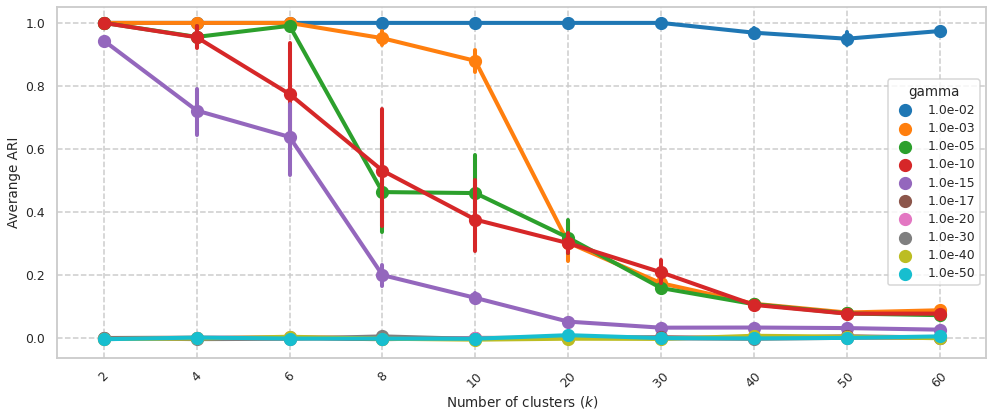

In [69]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="n_clusters", y="ari", hue="gamma")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Conclusions

**UPDATE** We choose `1e-10` as the `gamma` parameter for this data version.